## Algorithms performance using MNIST data
The *Fashion MNIST* dataset is a database of (low-resolution) clothing images that is similar to MNIST but somewhat more challenging.

a. Load the dataset and display 10 representative images from each class.
b. Implement the following classification methods: k-NN, logistic regression, and support vector machines (with linear and rbf kernels. You can use sklearn.
b. Report best possible test-error performances by tuning hyperparameters in each of your methods.

c. Report train- and test-running time of each of your methods in the form of a table, and comment on the relative tradeoffs across the different methods.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time

from sklearn import metrics, svm 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
import torch
import torchvision


### Load the Fasion MNIST DataSet

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

Accuracy = []
TestRuntime = []
TrainRuntime = []


#### Display 10 representative images from each class.

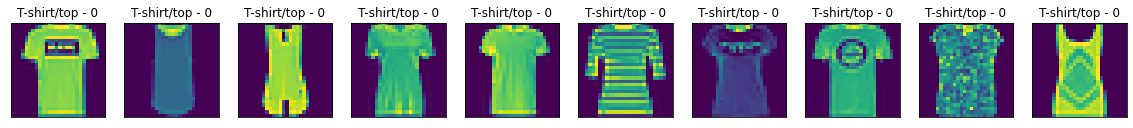

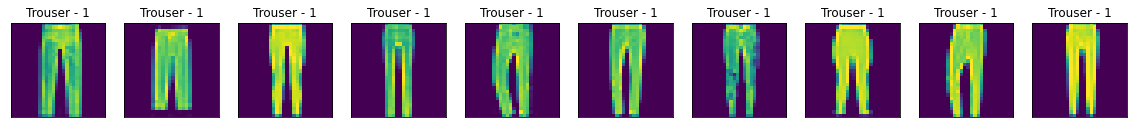

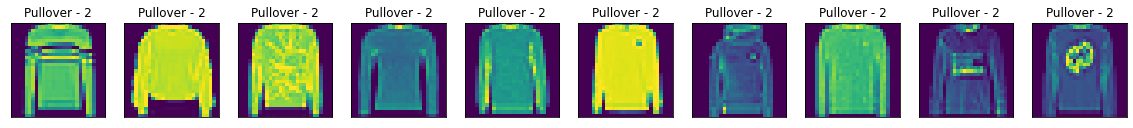

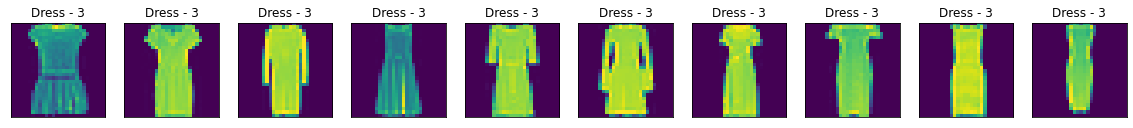

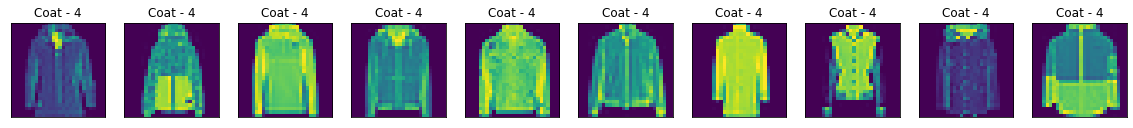

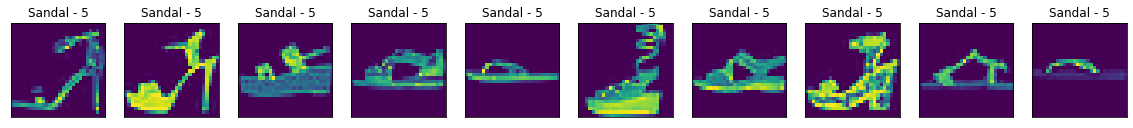

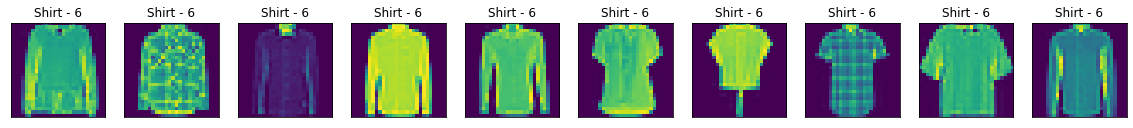

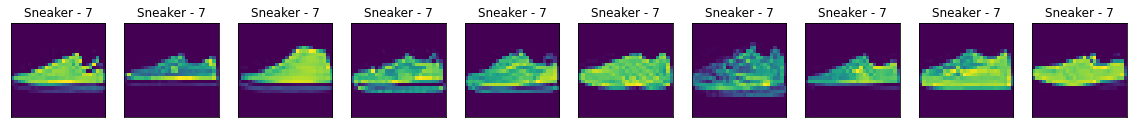

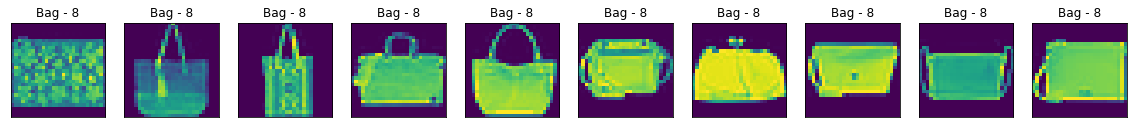

<Figure size 1440x576 with 0 Axes>

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20,8))
i = 0
for i in range(0,9):
  index = 0
  for (image, label) in zip(train_images,train_labels):
    if(i == label):
      index += 1
      plt.subplot(1,10,index)
      plt.title("{0} - {1}".format(class_names[label], label))
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      # plt.imshow(image,cmap=plt.cm.gray)
      plt.imshow(image)  
    if(index == 10):
      break
  plt.figure(figsize=(20,8))


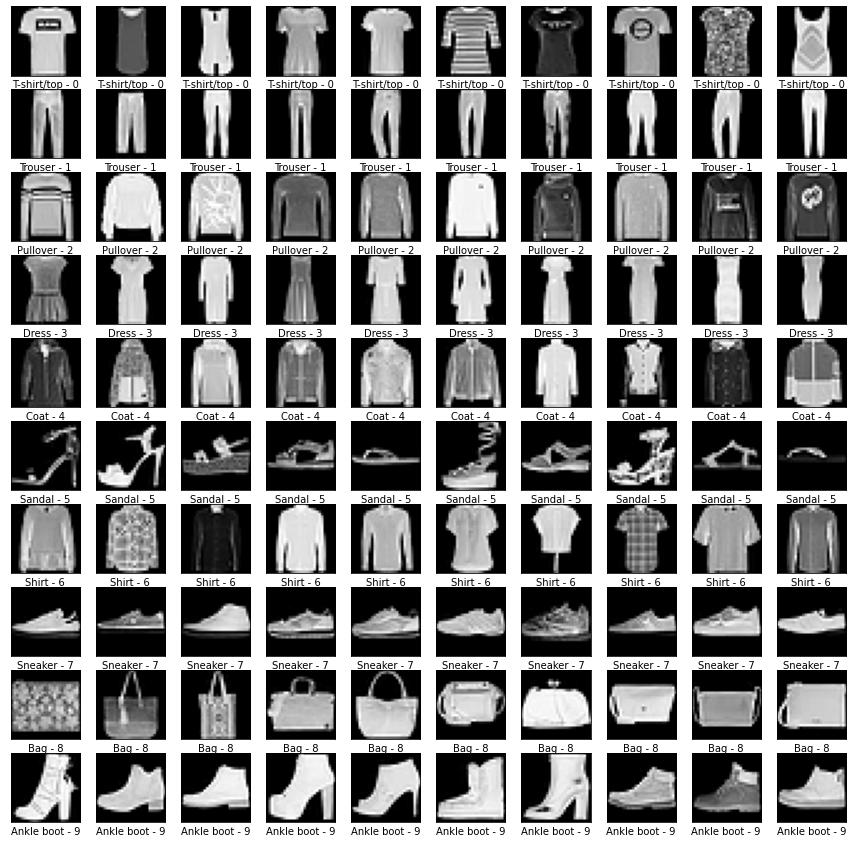

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15,15))
i = 0

for n in np.arange(0, 10, 1):
  count = 0
  index = 0
  while count < 10:
    index = index + 1;
    if train_labels[index] == n:
      count= count+1;
      i=i+1
      plt.subplot(10,10,i)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[index],cmap=plt.cm.gray)
      plt.xlabel("{0} - {1}".format(class_names[train_labels[index]], train_labels[index] ))
     
plt.show()

# %matplotlib inline
# plt.imshow(train_images[1])
# plt.show()

#### Modify the data 

In [5]:
print(train_images.shape)
print(test_images.shape)

scaler = StandardScaler()
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
train_images = scaler.fit_transform(train_images)
test_images = scaler.fit_transform(test_images)

print(train_images.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)


In [6]:
# Taking sample of the data set to make the runtime faster 
# Comment this cell to make it run for the complete dataset

train = train_images[0:10000,:]
label = train_labels[0:10000]
test = test_images[0:1500,:]
test_lab = test_labels[0:1500]

print(train.shape)

train_images = train
train_labels = label
test_images = test
test_labels = test_lab


(10000, 784)


### Algorithms

#### KNN Classifier


In [7]:
# %%time
k = 5
classifier = KNeighborsClassifier(n_neighbors=k)  
t0 = time.time()
classifier.fit(train_images, train_labels)

KNN_train_runtime = time.time() - t0

# print(classification_report(test_labels, y_pred)) 
KNN_accuracy = classifier.score(test_images,test_labels)*100
# KNN_accuracy = accuracy_score(test_labels, y_pred)*100

t0 = time.time()
predictions_knn = classifier.predict(test_images)
KNN_test_runtime = time.time() - t0

Accuracy.append(KNN_accuracy)
print("KNN Accuracy - ",KNN_accuracy)

TrainRuntime.append(KNN_train_runtime)
print("KNN Train Runtime - ",KNN_train_runtime)
      
TestRuntime.append(KNN_test_runtime)
print("KNN Test Runtime - ",KNN_test_runtime)


KNN Accuracy -  82.13333333333334
KNN Train Runtime -  0.8755040168762207
KNN Test Runtime -  25.105881929397583


#### Logistic Regression

In [8]:

logisticReg = LogisticRegression(penalty='l2',tol=0.1,solver='saga',C=0.001)

t0 = time.time()
logisticReg.fit(train_images,train_labels)
LR_train_runtime = time.time() - t0

LR_accuracy = logisticReg.score(test_images,test_labels)*100

t0 = time.time()
predictions_lr = logisticReg.predict(test_images)
LR_test_runtime = time.time() - t0

Accuracy.append(LR_accuracy)
print("LR Accuracy - ",LR_accuracy)
TrainRuntime.append(LR_train_runtime)
print("LR Train Runtime - ",LR_train_runtime)
TestRuntime.append(LR_test_runtime)
print("LR Test Runtime - ", LR_test_runtime)



LR Accuracy -  79.53333333333333
LR Train Runtime -  1.9072620868682861
LR Test Runtime -  0.0028772354125976562


#### SVM Linear Kernel

In [9]:
from sklearn.svm import SVC
svm_lin = SVC(gamma='auto',kernel='linear', max_iter=50000)

t0 = time.time()
svm_lin.fit(train_images,train_labels)
SVM_train_runtime = time.time() - t0

SVM_accuracy = svm_lin.score(test_images,test_labels)*100

t0 = time.time()
predictions_svmlin = logisticReg.predict(test_images)
SVM_test_runtime = time.time() - t0

Accuracy.append(SVM_accuracy)
print("SVM Accuracy - ",SVM_accuracy)

TrainRuntime.append(SVM_train_runtime)
print("SVM Linear Train Runtime",SVM_train_runtime)

TestRuntime.append(SVM_test_runtime)
print("SVM Linear Test Runtime - ",SVM_test_runtime)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVM Accuracy -  81.13333333333334
SVM Linear Train Runtime 20.91178011894226
SVM Linear Test Runtime -  0.0038051605224609375


#### SVM RBF Kernel

In [10]:
from sklearn.svm import SVC
svm_rbf = SVC(gamma='auto',kernel='rbf', max_iter=50000)

t0 = time.time()
svm_rbf.fit(train_images,train_labels)
SVM_RBF_train_runtime = time.time() - t0

SVM_RBF_accuracy = svm_rbf.score(test_images,test_labels)*100

t0 = time.time()
predictions_rbf = logisticReg.predict(test_images)
SVM_RBF_test_runtime = time.time() - t0

Accuracy.append(SVM_RBF_accuracy)
print("SVM RBF Accuracy - ",SVM_RBF_accuracy)

TrainRuntime.append(SVM_RBF_train_runtime)
print("SVM RBF Test Runtime",SVM_RBF_train_runtime)

print("SVM RBF Test Runtime",SVM_RBF_test_runtime)
TestRuntime.append(SVM_RBF_test_runtime)

SVM RBF Accuracy -  85.26666666666667
SVM RBF Test Runtime 32.46597480773926
SVM RBF Test Runtime 0.003762483596801758


### Printing Train and Test times 

In [11]:
Algorithms = ["KNN Classifier ", "Logistic Refgression" , "SVM with Linear Kernel", "SVM with RBF Kernel"]

print("Score for Logistic Regression is ",KNN_accuracy)
print("Score for K Nearest Neighbors is ",LR_accuracy)
print("Score for SVM with Linear Kernel is ",SVM_accuracy)
print("Score for SVM with RBF Kernel is ",SVM_RBF_accuracy)

# print(Accuracy)
# print(Algorithms)
# print(TrainRuntime)
# print(TestRuntime)


Score for Logistic Regression is  82.13333333333334
Score for K Nearest Neighbors is  79.53333333333333
Score for SVM with Linear Kernel is  81.13333333333334
Score for SVM with RBF Kernel is  85.26666666666667


In [12]:
from astropy.table import QTable
import astropy.units as u
import numpy as np

a = Algorithms
b = Accuracy
c = TrainRuntime
d = TestRuntime

t = QTable([a, b, c, d],
           names=('Algorithms','Accuracy','Train Runtime','Test Runtime'),
           meta={'name': 'first table'})

t


Algorithms,Accuracy,Train Runtime,Test Runtime
str22,float64,float64,float64
KNN Classifier,82.13333333333334,0.8755040168762207,25.105881929397583
Logistic Refgression,79.53333333333333,1.9072620868682861,0.0028772354125976562
SVM with Linear Kernel,81.13333333333334,20.91178011894226,0.0038051605224609375
SVM with RBF Kernel,85.26666666666667,32.46597480773926,0.003762483596801758
